## Instructions

We will train polynomial SVC in this homework.

Use the seed 0 everywhere.

1. First, generate the two moon data as follows:

"X, y = make_moons(n_samples=200, noise=0.3, random_state=0)"

Plot the data.

Randomly split the data into 80% training data and 20% testing data. Then split the training data again into 75% training data and 25% validation data. Keep this split fixed throughout the experiments.

2. For each combinations of Cs = [1E-3,1E-2,1E-1,1E0,1E1,1E2,1E3] and ds = [2,3,4]
(a) create a pipeline of polynomial features of degree d, standard scaler and linear SVC with the hyperparameter C
(b) call fit(),
(c) call predict() and measure training and validation error
Report the training and validation error for each combination.

3. Which combination has the smallest validation error? (You can manually find the minimum or you can use "i, j = np.unravel_index(np.argmin(val_errors, axis=None), val_errors.shape)" )

4. Repeat 2 with a pipeline of standard scaler and SVC with the polynomial kernel of degree d, coef0=1, and the hyperparameter C.

5. Repeat 3 with a pipeline of standard scaler and SVC .... (same as above)

6. Should the results of 3 and 5 be identical? Or if not, why? Please comment.

## 0. Importing Libraries

In [1]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate

## 1. Data Generation

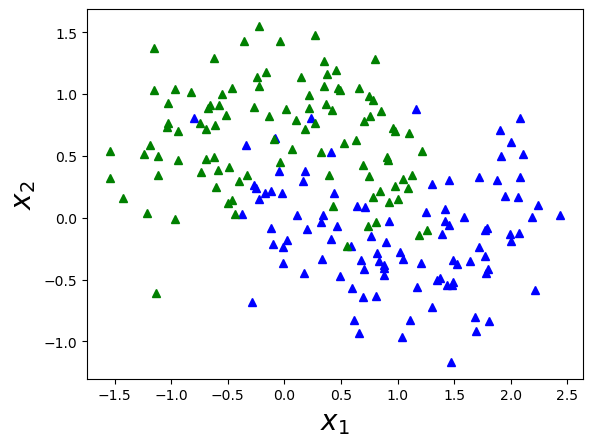

In [2]:
# Generating random data using sklearn.datasets.make_moons
X, y = make_moons(n_samples=200, noise=0.3, random_state=0)

# Splitting data into train and test sets, and then training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

# Plot make_moons data, features separated by color
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

plt.show()

## 2. Pipeline/Hyper-Parameter Search

In [3]:
CList =  [1E-3,1E-2,1E-1,1E0,1E1,1E2,1E3]
dList = [2,3,4]

results = []

for c in CList:
    for d in dList:
        # Create and fit pipeline with polynomial features of degree d, sdandard scaler, and linearSVC with C = c
        # dual = False because number of samples > number of parameters, max_iter left unchecked
        pipe = Pipeline([('poly', PolynomialFeatures(degree = d)), ('scaler', StandardScaler()),('linearsvc', LinearSVC(random_state = 0, C = c, dual = False))])
        pipe.fit(X_train_train, y_train_train)
        
        # Get training error
        pipe_train_predict = pipe.predict(X_train_train)
        train_error = mean_squared_error(pipe_train_predict, y_train_train)
        
        # Get validation error
        pipe_val_predict = pipe.predict(X_train_val)
        val_error = mean_squared_error(pipe_val_predict, y_train_val)
        results.append([c, d, train_error, val_error])
    
# Tabulate Results
print(tabulate(results, headers = ["C", "DIMENSIONS", "TRAIN_ERROR", "VAL_ERROR"]))

       C    DIMENSIONS    TRAIN_ERROR    VAL_ERROR
--------  ------------  -------------  -----------
   0.001             2       0.166667        0.2
   0.001             3       0.175           0.15
   0.001             4       0.166667        0.2
   0.01              2       0.166667        0.175
   0.01              3       0.166667        0.175
   0.01              4       0.158333        0.175
   0.1               2       0.166667        0.175
   0.1               3       0.166667        0.125
   0.1               4       0.133333        0.125
   1                 2       0.166667        0.15
   1                 3       0.133333        0.075
   1                 4       0.116667        0.1
  10                 2       0.166667        0.15
  10                 3       0.116667        0.05
  10                 4       0.116667        0.05
 100                 2       0.166667        0.15
 100                 3       0.133333        0.05
 100                 4       0.116667       

## 3. Optimization

In [4]:
errorList = [r[3] for r in results]
min_error = min(errorList)
min_index = errorList.index(min(errorList))

print("The best combination of parameters is (c = %.3f, d = %d), with a training error of %.4f and a validation error of %.4f"%(results[min_index][0],results[min_index][1],results[min_index][2],results[min_index][3]))

The best combination of parameters is (c = 10.000, d = 3), with a training error of 0.1167 and a validation error of 0.0500


## 4. Pipeline/Hyper-Parameter Search II

In [5]:
CList =  [1E-3,1E-2,1E-1,1E0,1E1,1E2,1E3]
dList = [2,3,4]

results = []

for c in CList:
    for d in dList:
        # Create and fit pipeline with standard scaler and poly kernel svc
        pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(random_state = 0, C = c, kernel = 'poly', coef0 =1, degree = d))])
        pipe.fit(X_train_train, y_train_train)
        
        # Get training error
        pipe_train_predict = pipe.predict(X_train_train)
        train_error = mean_squared_error(pipe_train_predict, y_train_train)
        
        # Get validation error
        pipe_val_predict = pipe.predict(X_train_val)
        val_error = mean_squared_error(pipe_val_predict, y_train_val)
        results.append([c, d, train_error, val_error])
    
# Tabulate Results
print(tabulate(results, headers = ["C", "DIMENSIONS", "TRAIN_ERROR", "VAL_ERROR"]))

       C    DIMENSIONS    TRAIN_ERROR    VAL_ERROR
--------  ------------  -------------  -----------
   0.001             2       0.483333        0.5
   0.001             3       0.45            0.475
   0.001             4       0.25            0.25
   0.01              2       0.175           0.2
   0.01              3       0.166667        0.2
   0.01              4       0.166667        0.175
   0.1               2       0.166667        0.175
   0.1               3       0.166667        0.15
   0.1               4       0.133333        0.125
   1                 2       0.166667        0.175
   1                 3       0.133333        0.075
   1                 4       0.125           0.125
  10                 2       0.166667        0.175
  10                 3       0.133333        0.075
  10                 4       0.125           0.05
 100                 2       0.166667        0.175
 100                 3       0.125           0.05
 100                 4       0.116667    

## 5. Optimization II

In [6]:
errorList = [r[3] for r in results]
min_error = min(errorList)
min_index = errorList.index(min(errorList))

print("The best combination of parameters is (c = %.3f, d = %d), with a training error of %.4f and a validation error of %.4f"%(results[min_index][0],results[min_index][1],results[min_index][2],results[min_index][3]))

The best combination of parameters is (c = 10.000, d = 4), with a training error of 0.1250 and a validation error of 0.0500


## 6. Comparing Results

*The actual parameters can be different, since the methods of doing the regression underneath are different (ie LinearSVC is one-vs-rest whereas SVC is one-vs-one, and both run on different underlying libraries). However, the resulting training and testing errors are very similar.*